In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
import keras
import keras.backend as K
from keras.layers import LSTM,Dropout,Dense,TimeDistributed,Conv1D,MaxPooling1D,Flatten
from keras.models import Sequential
import tensorflow as tf
import gc
from numba import jit
from IPython.display import display, clear_output
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sys
sns.set_style("whitegrid")

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/!modelCLSTM

Mounted at /gdrive
/gdrive/MyDrive/!modelCLSTM


In [ ]:
%pwd

'/gdrive/MyDrive/!modelCLSTM'

**DATA**

In [ ]:
df = pd.read_csv('v5data.csv',sep=',')
df = df.drop(df.columns[0],axis=1)
df = df.drop(df.columns[4:], axis=1)
df=df.dropna()
df=df.dropna(axis=0)
print(df.shape)
print(df)

(19500, 4)
       Y    EAR     MAR     MOE
0      0  0.2310  0.7400  3.203
1      0  0.3550  0.7160  2.017
2      0  0.2580  0.6350  2.461
3      0  0.1550  0.6110  3.942
4      0  0.1860  0.6440  3.462
...   ..     ...     ...    ...
19495  0  0.1860  0.6333  3.405
19496  0  0.2485  0.6507  2.619
19497  0  0.2194  0.6928  3.158
19498  0  0.2815  0.6528  2.319
19499  0  0.1959  0.6196  3.163

[19500 rows x 4 columns]


In [ ]:
train_percentage = 0.60
train_index = int(len(df)*train_percentage)
test_index = len(df)-train_index

In [ ]:
df_train = df[:train_index]
df_test = df[-test_index:]
print(df_train)
print(df_test)

       Y   EAR    MAR      MOE
0      0  0.231  0.740   3.203
1      0  0.355  0.716   2.017
2      0  0.258  0.635   2.461
3      0  0.155  0.611   3.942
4      0  0.186  0.644   3.462
...   ..    ...    ...     ...
11695  1  0.124  0.955   7.702
11696  1  0.097  0.937   9.660
11697  1  0.113  1.185  10.487
11698  1  0.152  0.966   6.355
11699  1  0.247  0.918   3.717

[11700 rows x 4 columns]
       Y    EAR     MAR      MOE
11700  1  0.2520  0.9000   3.571
11701  1  0.2150  0.9520   4.428
11702  1  0.0900  1.0680  11.867
11703  1  0.0890  1.0860  12.202
11704  1  0.0870  1.0060  11.563
...   ..     ...     ...     ...
19495  0  0.1860  0.6333   3.405
19496  0  0.2485  0.6507   2.619
19497  0  0.2194  0.6928   3.158
19498  0  0.2815  0.6528   2.319
19499  0  0.1959  0.6196   3.163

[7800 rows x 4 columns]


In [ ]:
x_test = df_test.drop(["Y"],axis=1)
y_test = df_test["Y"]
print(x_test)
print(y_test)

         EAR     MAR      MOE
11700  0.2520  0.9000   3.571
11701  0.2150  0.9520   4.428
11702  0.0900  1.0680  11.867
11703  0.0890  1.0860  12.202
11704  0.0870  1.0060  11.563
...       ...     ...     ...
19495  0.1860  0.6333   3.405
19496  0.2485  0.6507   2.619
19497  0.2194  0.6928   3.158
19498  0.2815  0.6528   2.319
19499  0.1959  0.6196   3.163

[7800 rows x 3 columns]
11700    1
11701    1
11702    1
11703    1
11704    1
        ..
19495    0
19496    0
19497    0
19498    0
19499    0
Name: Y, Length: 7800, dtype: int64


In [ ]:
x_train = df_train.drop('Y',axis=1)
y_train = df_train['Y']

In [ ]:
x_test.shape

(7800, 3)

In [ ]:
x_train.shape


(11700, 3)

In [ ]:
y_test.shape

(7800,)

In [ ]:
y_train.shape

(11700,)

In [ ]:
# import numpy as np
# x_shaped_train  = np.array(x_train).reshape(800,2,2) #9600 : 5
# x_shaped_test  = np.array(x_test).reshape(200,2,2)

# print(x_shaped_train)

In [ ]:
import numpy as np
x_shaped_train  = np.array(x_train).reshape(2340,5,3) #9600 : 5
x_shaped_test  = np.array(x_test).reshape(1560,5,3)

print(x_shaped_train)

[[[ 0.231  0.74   3.203]
  [ 0.355  0.716  2.017]
  [ 0.258  0.635  2.461]
  [ 0.155  0.611  3.942]
  [ 0.186  0.644  3.462]]

 [[ 0.299  0.774  2.589]
  [ 0.155  0.559  3.606]
  [ 0.21   0.589  2.805]
  [ 0.286  0.605  2.115]
  [ 0.307  0.685  2.231]]

 [[ 0.254  0.682  2.685]
  [ 0.343  0.762  2.222]
  [ 0.173  0.525  3.035]
  [ 0.251  0.668  2.661]
  [ 0.228  0.607  2.662]]

 ...

 [[ 0.175  0.977  5.583]
  [ 0.112  1.141 10.188]
  [ 0.103  1.064 10.33 ]
  [ 0.112  1.077  9.616]
  [ 0.111  1.002  9.027]]

 [[ 0.143  0.988  6.909]
  [ 0.12   0.954  7.95 ]
  [ 0.113  1.167 10.327]
  [ 0.048  1.048 21.833]
  [ 0.126  1.069  8.484]]

 [[ 0.124  0.955  7.702]
  [ 0.097  0.937  9.66 ]
  [ 0.113  1.185 10.487]
  [ 0.152  0.966  6.355]
  [ 0.247  0.918  3.717]]]


In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

y_shaped_train  = []
for i in range(0, len(y_train), 5):
  y_shaped_train.append([y_train[i]])
print(len(y_shaped_train))

y_shaped_test  = []
for i in range(0, len(y_test), 5):
  y_shaped_test.append([y_test[i]])
print(len(y_shaped_test))

2340
1560


In [ ]:
x_shaped_train.shape

(2340, 5, 3)

In [ ]:
x_shaped_test.shape

(1560, 5, 3)

In [ ]:
y_shaped_train = np.array(y_shaped_train)
y_shaped_train.shape

(2340, 1)

In [ ]:
y_shaped_test = np.array(y_shaped_test)
y_shaped_test.shape

(1560, 1)

**CLSTM**

In [ ]:
def keras_auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

In [ ]:
import numpy as np
from keras.utils import to_categorical
from keras.layers import Dense, Flatten, Dropout, ZeroPadding3D
# from keras.layers.recurrent import LSTM
from keras.layers import LSTM
from keras.models import Sequential, load_model
from keras.optimizers import Adam, RMSprop
# from keras.layers.wrappers import TimeDistributed
from tensorflow.keras.layers import Flatten, GRU, Dropout, TimeDistributed, Dense
from keras.layers.convolutional import (Conv2D, MaxPooling3D, Conv3D,
    MaxPooling2D)
from collections import deque
import sys
import tensorflow as tf

#definisi model
metrics = ['accuracy']
model = Sequential()

model.add(TimeDistributed(Conv1D(64, kernel_size = 3, activation = 'relu', input_shape = (5,3))))
# model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation = 'relu'))
model.add(TimeDistributed(Flatten()))

# model.add(Dense(1024, activation='sigmoid'))
model.add(LSTM(300, return_sequences=True,
                       input_shape=(5, 4,),
                       dropout=0.5))

model.add(Dense(100, activation='relu'))
model.add(Dense(1,activation = 'sigmoid'))

optimizer = Adam(learning_rate=0.00001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


# patient early stopping
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

#model checkpoint
mc = tf.keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

#fit model
history=model.fit(tf.expand_dims(x_shaped_train, axis=-1), y_shaped_train, validation_data = (x_shaped_test,y_shaped_test), epochs=500, batch_size= 50, verbose=0, callbacks=[es,mc])

# load the saved model
saved_model = load_model('best_model.h5')

#evaluate the model
_, train_acc = model.evaluate(x_shaped_train, y_shaped_train, verbose=0)
_, test_acc = model.evaluate(x_shaped_test,y_shaped_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# #plot training history
# pyplot.plot(history.history['loss'], label='train')
# pyplot.plot(history.history['val_loss'], label='test')
# pyplot.legend()
# pyplot.show()


Epoch 1: val_accuracy improved from -inf to 0.51859, saving model to best_model.h5

Epoch 2: val_accuracy did not improve from 0.51859

Epoch 3: val_accuracy did not improve from 0.51859

Epoch 4: val_accuracy did not improve from 0.51859

Epoch 5: val_accuracy did not improve from 0.51859

Epoch 6: val_accuracy improved from 0.51859 to 0.51923, saving model to best_model.h5

Epoch 7: val_accuracy improved from 0.51923 to 0.52064, saving model to best_model.h5

Epoch 8: val_accuracy improved from 0.52064 to 0.52462, saving model to best_model.h5

Epoch 9: val_accuracy improved from 0.52462 to 0.53449, saving model to best_model.h5

Epoch 10: val_accuracy improved from 0.53449 to 0.55795, saving model to best_model.h5

Epoch 11: val_accuracy improved from 0.55795 to 0.56731, saving model to best_model.h5

Epoch 12: val_accuracy improved from 0.56731 to 0.60936, saving model to best_model.h5

Epoch 13: val_accuracy improved from 0.60936 to 0.63372, saving model to best_model.h5

Epoch 1

In [ ]:
print (val_loss)

NameError: ignored

In [ ]:
from keras.models import Sequential, load_model
model = load_model('best_model.h5')

OSError: ignored

In [ ]:
_, train_acc = model.evaluate(x_shaped_train, y_shaped_train, verbose=0)
_, test_acc = model.evaluate(x_shaped_test,y_shaped_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.969, Test: 0.935


In [ ]:


confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

AttributeError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


y_pred = model.predict(x_shaped_test)
y_pred = np.argmax(y_pred, axis=1)

conf_mat = confusion_matrix(y_shaped_test, y_pred)
conf_mat=metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

conf_mat.plot()
plt.show()

**INFERENCE**

In [ ]:
df_test = pd.read_csv('2.csv',sep=',')
df_test = df_test.drop(df_test.columns[0],axis=1)
df_test = df_test.drop(df_test.columns[4:], axis=1)
df_test=df_test.dropna()
df_test=df_test.dropna(axis=0)
print(df_test.shape)
print(df_test)

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8

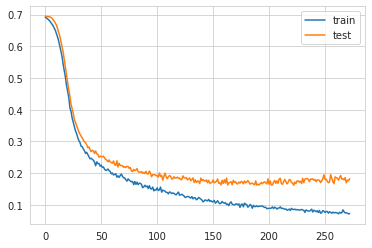

In [ ]:
#plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

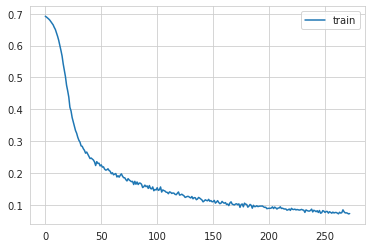

In [ ]:
#plot training history
plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

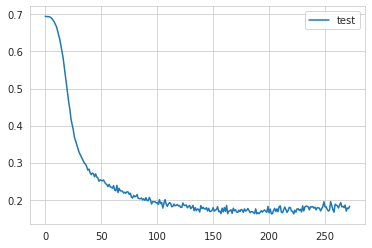

In [ ]:
#plot training history
# plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

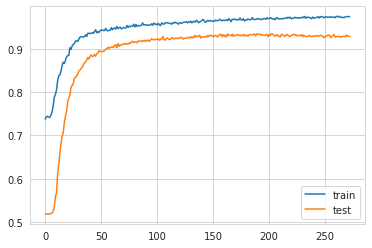

In [ ]:
#plot training history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

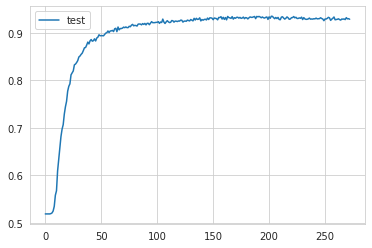

In [ ]:
#plot training history
# plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

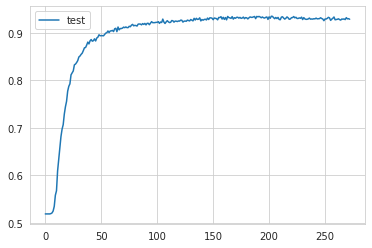

In [ ]:
#plot training history
# plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve

pred = model.predict(x_shaped_test)
print (pred)
# conf = confusion_matrix(y_shaped_test, pred)

49/49 [==============================] - 1s 11ms/step
[[[1.0683133e-01]
  [7.3497087e-02]
  [9.9767983e-01]
  [9.9999791e-01]
  [9.9999994e-01]]

 [[9.8683161e-01]
  [9.9997681e-01]
  [9.9999982e-01]
  [1.0000000e+00]
  [1.0000000e+00]]

 [[9.8311800e-01]
  [9.9998534e-01]
  [9.9999988e-01]
  [1.0000000e+00]
  [1.0000000e+00]]

 ...

 [[5.9751645e-02]
  [4.8092646e-03]
  [6.0925563e-04]
  [2.7150792e-05]
  [4.5334789e-07]]

 [[5.5856273e-02]
  [6.7454083e-03]
  [4.3004352e-04]
  [1.3450918e-05]
  [2.2238015e-07]]

 [[9.8309867e-02]
  [1.1139491e-02]
  [1.4911587e-03]
  [5.9995851e-05]
  [2.4713213e-06]]]


In [ ]:
from sklearn.metrics import precision_recall_curve

preds = model.predict(x_shaped_test)

y_shaped_test = y_shaped_test.reshape(-1, 1)

# calculate pr curve
# precision, recall, thresholds = precision_recall_curve(y_shaped_test, preds)

# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

49/49 [==============================] - 1s 11ms/step


NameError: ignored

**Save Model**

In [ ]:
models_dir = '/gdrive/MyDrive/model2_drowsiness/model/model.h5'
tf.keras.models.save_model(model, models_dir)

In [ ]:
loaded = tf.saved_model.load(models_dir)
print(list(loaded.signatures.keys()))  # ["serving_default"]

In [ ]:
infer = loaded.signatures["serving_default"]
print(infer.structured_outputs)

In [ ]:
# Load SavedModel
import tensorflow_hub as hub
model = hub.load(models_dir)
print(lstm_model)

In [ ]:
%cd /gdrive/MyDrive/model2_drowsiness
!pwd

In [ ]:
!mkdir "tflite_models_v2"

In [ ]:
TFLITE_MODEL = "/gdrive/MyDrive/model2_drowsiness/tflite_models_v2/clstm_lite_v2.tflite"
TFLITE_QUANT_MODEL = "/gdrive/MyDrive/model2_drowsiness/tflite_models_v2/clstm_quant_v2.tflite"

In [ ]:
model = tf.keras.models.load_model(models_dir)
model.summary()
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tfmodel = converter.convert()
open(TFLITE_MODEL, 'wb').write(tfmodel)
